<a href="https://colab.research.google.com/github/maite828/Machine-Learning/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Análisis Exploratorio



In [3]:
from sklearn import datasets
boston = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
boston_data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


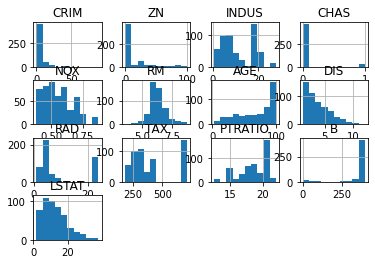

In [6]:
boston_data.hist()
plt.show()

In [7]:
print(boston_data.groupby('RM').size())

RM
3.561    1
3.863    1
4.138    2
4.368    1
4.519    1
        ..
8.375    1
8.398    1
8.704    1
8.725    1
8.780    1
Length: 446, dtype: int64


## Obtenemos la media de la variables independiente: target

In [8]:
boston.target.mean()

22.532806324110677

## Convertimos a matriz con numpy: (2, 506)

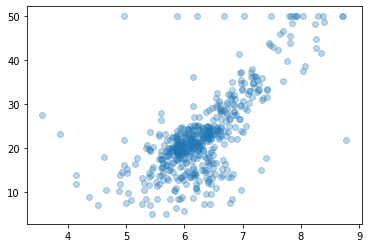

In [9]:
X = np.array(boston.data[:,5])
Y = np.array(boston.target)

plt.scatter(X, Y, alpha=0.3)

Añadimos columna de unos(1s) para termino independiente, cuando se hace la multiplicación esa columna de unos hace que la primera parte de la columna beta no se quede sin valores y la trasponemos queremos conseguir (506, 2)

In [10]:
X = np.array([np.ones(boston.target.shape[0]), X]).T
print(X)

[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 ...
 [1.    6.976]
 [1.    6.794]
 [1.    6.03 ]]


Definimos la matrix traspuesta de X, y la multiplicamos por X, nos interesa la multiplicación matricial, usamos el paquete de algebra lineal y luego caculamos la inversa con np.linalg.inv
# Formula minimizar el error cuadrático medio (MCO): 
# $\beta = (X^{T}X)^{-1}X^{T}Y$

Para saber que está bien, nos encontramos con 2 elementos:
El elemento independiente de nuestra linea y la pendiente nuestra linea

In [11]:
B = np.linalg.inv(X.T @ X) @ X.T @ Y
B

array([-34.67062078,   9.10210898])


*   -34.67062078 representa el punto en el eje Y en el que se corta cuando X tiende a 0

*   09.10210898 tenemos el valor de la pendiente y lo vemos como un valor directo y parece que tiene sentido porque nos indica cada incremento en una unidad del número medio de habitaciones con incremento de 9 unidades del valor de la vivienda

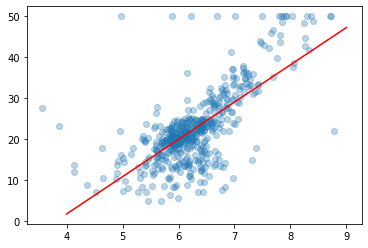

In [13]:
plt.plot([4, 9], [ B[0] + B[1] * 4, B[0] + B[1] * 9 ], c = "red")

X = np.array(boston.data[:,5])
Y = np.array(boston.target)
plt.scatter(X, Y, alpha=0.3)